# Code Description

In [1]:
              
      ##-----****---"On Duality of Stability and Capacity Regions in Intermittent Interference Networks"---****-----##
        
                ##---- This code is simulated the results of "Packet lifetime" in homogeneous setting ----##

                                  ## ---- Sajjad Nassirpour and Alireza Vahid ---- ##
        
                       ## ---- Electrical engineering at University of Codolardo Denver ---- ##

# Import Packages

In [3]:
## ---- Import essential packages ---- ## 
from scipy.stats import bernoulli
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")

## Function for finding the row of origin queues in Control Table 

In [4]:
## ---- Calculation for finding the row in control table ---- ##
def ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2):
    if number_of_packets_Q1[0,0]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=0
            pointer_2=0
            control_num=15
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=0
            pointer_2=1
            control_num=12
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=0
            pointer_2=3
            control_num=13
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=0
            pointer_2=2
            control_num=14
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=0
            pointer_2=4
            control_num=21

        
    elif number_of_packets_Q1[0,1]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=1
            pointer_2=0
            control_num=9
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=1
            pointer_2=1
            control_num=0
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=1
            pointer_2=3
            control_num=1
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=1
            pointer_2=2
            control_num=2
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=1
            pointer_2=4
            control_num=22

            
    elif number_of_packets_Q1[0,2]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=2
            pointer_2=0
            control_num=10
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=2
            pointer_2=1
            control_num=3
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=2
            pointer_2=3
            control_num=4
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=2
            pointer_2=2
            control_num=5
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=2
            pointer_2=4
            control_num=23
            
            
    elif number_of_packets_Q1[0,3]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=3
            pointer_2=0
            control_num=11
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=3
            pointer_2=1
            control_num=6
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=3
            pointer_2=3
            control_num=7
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=3
            pointer_2=2
            control_num=8
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=3
            pointer_2=4
            control_num=24 
            
            
    elif number_of_packets_Q1[0,4]!=0:
        if number_of_packets_Q2[0,0]!=0:
            pointer_1=4
            pointer_2=0
            control_num=16
        elif number_of_packets_Q2[0,1]!=0:
            pointer_1=4
            pointer_2=1
            control_num=17
        elif number_of_packets_Q2[0,3]!=0:
            pointer_1=4
            pointer_2=3
            control_num=19
        elif number_of_packets_Q2[0,2]!=0:
            pointer_1=4
            pointer_2=2
            control_num=18
        elif number_of_packets_Q2[0,4]!=0:
            pointer_1=4
            pointer_2=4
            control_num=20
          
      
    return pointer_1,pointer_2,control_num


## Function for finding the SN number

In [5]:
def case_cal(q11,q12,q21,q22):
    if q11==1 and q12==1 and q21==1 and q22==1:
        case_num=1
    elif q11==1 and q12==1 and q21==0 and q22==1:
        case_num=2
    elif q11==1 and q12==0 and q21==1 and q22==1:
        case_num=3
    elif q11==1 and q12==0 and q21==0 and q22==1:
        case_num=4
    elif q11==1 and q12==0 and q21==0 and q22==0:
        case_num=5
    elif q11==1 and q12==1 and q21==0 and q22==0:
        case_num=6
    elif q11==1 and q12==0 and q21==1 and q22==0:
        case_num=7
    elif q11==1 and q12==1 and q21==1 and q22==0:
        case_num=8
    elif q11==0 and q12==0 and q21==0 and q22==1:
        case_num=9
    elif q11==0 and q12==0 and q21==1 and q22==1:
        case_num=10
    elif q11==0 and q12==1 and q21==0 and q22==1:
        case_num=11
    elif q11==0 and q12==1 and q21==1 and q22==1:
        case_num=12
    elif q11==0 and q12==0 and q21==1 and q22==0:
        case_num=13
    elif q11==0 and q12==1 and q21==0 and q22==0:
        case_num=14
    elif q11==0 and q12==1 and q21==1 and q22==0:
        case_num=15
    elif q11==0 and q12==0 and q21==0 and q22==0:
        case_num=16
    return case_num


# Function for packet movement when only T1 has packet to send

In [6]:
def T1_select(number_of_packets_Q1,q11,q12):
    if number_of_packets_Q1[0,0]!=0:
        pointer_1=0
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=1

    elif number_of_packets_Q1[0,1]!=0:
        pointer_1=1
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=2
    elif number_of_packets_Q1[0,2]!=0:
        pointer_1=2
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=3
        elif q11==0 and q12==0:
            Q_des_Q1=3
    elif number_of_packets_Q1[0,3]!=0:
        pointer_1=3
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=4
        elif q11==0 and q12==1:
            Q_des_Q1=6
        elif q11==0 and q12==0:
            Q_des_Q1=4
    elif number_of_packets_Q1[0,4]!=0:
        pointer_1=4
        if q11==1 and q12==1:
            Q_des_Q1=6
        elif q11==1 and q12==0:
            Q_des_Q1=6
        elif q11==0 and q12==1:
            Q_des_Q1=5
        elif q11==0 and q12==0:
            Q_des_Q1=5
    return Q_des_Q1,pointer_1
            

# Function for packet movement when only T2 has packet to send

In [7]:
def T2_select(number_of_packets_Q2,q22,q21):
    if number_of_packets_Q2[0,0]!=0:
        pointer_2=0
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=1

    elif number_of_packets_Q2[0,1]!=0:
        pointer_2=1
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=2
            
    elif number_of_packets_Q2[0,3]!=0:
        pointer_2=3
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=4
        elif q22==0 and q21==0:
            Q_des_Q2=4
    
    elif number_of_packets_Q2[0,2]!=0:
        pointer_2=2
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=3
        elif q22==0 and q21==1:
            Q_des_Q2=6
        elif q22==0 and q21==0:
            Q_des_Q2=3
    
    elif number_of_packets_Q2[0,4]!=0:
        pointer_2=4
        if q22==1 and q21==1:
            Q_des_Q2=6
        elif q22==1 and q21==0:
            Q_des_Q2=6
        elif q22==0 and q21==1:
            Q_des_Q2=5
        elif q22==0 and q21==0:
            Q_des_Q2=5
            
    return Q_des_Q2,pointer_2

## Read control table CSV files

In [8]:
## ---- Control Table for T1 ---- ##
control_I_T1=pd.read_csv('Control table for T1_life_time_ v2.csv')
control_I_T1=control_I_T1.values

## ---- Control Table for T2 ---- ##
control_I_T2=pd.read_csv('Control table for T2_life_time_ v2.csv')
control_I_T2=control_I_T2.values

# Transmission Protocol

In [9]:
Arrive_time=np.array([100,1000,5000,10000,25000,35000,50000])
total_mean_T1=np.zeros((1,np.size(Arrive_time)))
total_max_T1=np.zeros((1,np.size(Arrive_time)))

total_mean_T2=np.zeros((1,np.size(Arrive_time)))
total_max_T2=np.zeros((1,np.size(Arrive_time)))

## ---- Calculate number of iteration based on "communication_time", "erasure_probability", "reliability" and "accuracy" ---- ##
for comm_t in range(np.size(Arrive_time)):
    communication_time=Arrive_time[comm_t]
    erasure_probability=0.4
    reliability=0.95
    accuracy=0.002
    iters=np.round(1/(((1-reliability)/(erasure_probability*(1-erasure_probability)))*accuracy**2*communication_time))
    iters=iters.astype(np.int64)
    
    ## ---- Initial values for mean, max values of packet life time ---- ##
    # ---- Mean_values ---- #
    mean_1=0
    mean_2=0
    # ---- Max_values ---- #
    max_pkt_1=0
    max_pkt_2=0
    # ---- Error_values ---- #
    delta_1=0
    delta_2=0
    for rep in range(iters):
        print('repetition=',rep+1) # print current repetition number
        print('Communication_time=',communication_time)
        print('Number of iterations=',iters)
        last_period=np.round(0.15*communication_time).astype(np.int64)
        packet_num=np.round(communication_time).astype(np.int64)

        # ---- Maximum_rate corner point when erasure_probability=0.4 ---- #

        lambda_1=0.49
        lambda_2=0.49
        print('lambda_1=',lambda_1)
        print('lambda_2=',lambda_2)

        # ---- Generate Poisson sequences with lambda=0.49 ---- #
        arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
        lambda_1_r=np.sum(arrived_pkt_1)/packet_num

        arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
        lambda_2_r=np.sum(arrived_pkt_2)/packet_num

        # ---- Make sure that generated sequences has lambda=0.49 ---- #

        while (lambda_1-0.00001)>lambda_1_r or lambda_1_r>lambda_1:
            arrived_pkt_1=poisson.rvs(lambda_1, size=packet_num)
            lambda_1_r=np.sum(arrived_pkt_1)/packet_num

        while (lambda_2-0.00001)>lambda_2_r or lambda_2_r>lambda_2:
            arrived_pkt_2=poisson.rvs(lambda_2, size=packet_num)
            lambda_2_r=np.sum(arrived_pkt_2)/packet_num

        # ---- Number of arrived packets when lambda=0.49 ---- #

        real_packet_num_1=np.round(packet_num*lambda_1).astype(np.int64)
        real_packet_num_2=np.round(packet_num*lambda_2).astype(np.int64)

        pkt_life_time_1=np.zeros((1,real_packet_num_1))
        pkt_life_time_2=np.zeros((1,real_packet_num_2))

        # ---- Initial values for XOR numbers ---- #

        Q1_12_XOR=np.zeros((real_packet_num_1, (real_packet_num_1+1)))
        for i_j in range(real_packet_num_1):
            Q1_12_XOR[i_j,0]=i_j
            Q1_12_XOR[i_j,-1]=1
        Q2_12_XOR=np.zeros((real_packet_num_2, (real_packet_num_2+1)))
        for i_j in range(real_packet_num_2):
            Q2_12_XOR[i_j,0]=i_j
            Q2_12_XOR[i_j,-1]=1

        pkt_ind_1=-1
        pkt_ind_2=-1


        # ----- initial value for all of the Queues(Q1) ----- #

        Q1_total=np.zeros((6, packet_num))
        number_of_packets_Q1=np.zeros((1, 6))
        for num_pkt1 in range(5):
            number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

        # ----- initial value for all of the Queues(Q2) ----- #

        Q2_total=np.zeros((6, packet_num))
        number_of_packets_Q2=np.zeros((1, 6))
        for num_pkt2 in range(5):
            number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])


        # ----- Bernoulli Generators for C_ij(t) ----- #
        q11=1-erasure_probability
        q12=1-erasure_probability
        q21=1-erasure_probability
        q22=1-erasure_probability

        uu=1000 # uu is used to show every proceess for packet_num on every 1000 communication_time
        for i in range(packet_num):
            
            if i==packet_num-last_period:
                Q1_F_temp=np.sum(Q1_total[5,:])
                Q2_F_temp=np.sum(Q2_total[5,:])
            
            if i>=uu:
                print(i)
                uu=uu+1000

            arrived_pkt_T1 = arrived_pkt_1[i]
            arrived_pkt_T2 = arrived_pkt_2[i]

            # ---- New arrived packets join initial queues ---- #

            if arrived_pkt_T1!=0:
                for p in range(arrived_pkt_T1):
                    Q_des_Q1=2
                    pkt_ind_1=pkt_ind_1+1
                    b1=pkt_ind_1
                    Q1_total[(Q_des_Q1-1),b1]=1

            if arrived_pkt_T2!=0:
                for p in range(arrived_pkt_T2):
                    Q_des_Q2=2
                    pkt_ind_2=pkt_ind_2+1
                    b2=pkt_ind_2
                    Q2_total[(Q_des_Q2-1),b2]=1

            for num_pkt1 in range(5):
                number_of_packets_Q1[0,num_pkt1]=np.count_nonzero(Q1_total[num_pkt1,:])

            for num_pkt2 in range(5):
                number_of_packets_Q2[0,num_pkt2]=np.count_nonzero(Q2_total[num_pkt2,:])

            pkt_process_ind_1=0
            pkt_process_ind_2=0

            if np.sum(number_of_packets_Q1)==0 or np.sum(number_of_packets_Q2)==0:
                if np.sum(number_of_packets_Q1)!=0:
                    data_q11= bernoulli.rvs(size=1,p=q11)
                    data_q12= bernoulli.rvs(size=1,p=q12)
                    Q_des_Q1,pointer_1=T1_select(number_of_packets_Q1,data_q11,data_q12)

                    ## ----- Packet movement from origin queue ----- ##

                    while Q1_total[(pointer_1),pkt_process_ind_1]==0:
                        pkt_process_ind_1=pkt_process_ind_1+1

                    a1=pkt_process_ind_1 
                    if Q1_12_XOR[pkt_process_ind_1,-1]>1:
                        position=Q1_12_XOR[pkt_process_ind_1,-1].astype(np.int64)

                        for po in range(position):
                            pos_1=Q1_12_XOR[pkt_process_ind_1,po].astype(np.int64)
                            pkt_life_time_1[0,pos_1]=pkt_life_time_1[0,pos_1]+1
                            if Q_des_Q1==6 and po!=0:
                                Q1_total[5,pos_1]=0.1

                    elif Q1_12_XOR[pkt_process_ind_1,-1]==1.0:
                        pkt_life_time_1[0,pkt_process_ind_1]=pkt_life_time_1[0,pkt_process_ind_1]+1
                    val=Q1_total[(pointer_1),a1]
                    Q1_total[(pointer_1),a1]=0

                    ## ----- Packet movement in destination queue ----- ## 

                    Q1_total[(Q_des_Q1-1),a1]=val
                    for pkt_L_1 in range(pkt_ind_1+1):
                        if Q1_total[5,pkt_L_1]==0:
                            if pkt_L_1!=pkt_process_ind_1:
                                pkt_life_time_1[0,pkt_L_1]=pkt_life_time_1[0,pkt_L_1]+1 
                if np.sum(number_of_packets_Q2)!=0:
                    data_q22= bernoulli.rvs(size=1,p=q22)
                    data_q21= bernoulli.rvs(size=1,p=q21)
                    Q_des_Q2,pointer_2=T2_select(number_of_packets_Q2,data_q22,data_q21)

                    ## ----- Packet movement from origin queue ----- ##

                    while Q2_total[(pointer_2),pkt_process_ind_2]==0:
                        pkt_process_ind_2=pkt_process_ind_2+1
                    a2=pkt_process_ind_2
                    if Q2_12_XOR[pkt_process_ind_2,-1]>1:
                        position_2=Q2_12_XOR[pkt_process_ind_2,-1].astype(np.int64)
                        for po in range(position_2):
                            pos_2=Q2_12_XOR[pkt_process_ind_2,po].astype(np.int64)
                            pkt_life_time_2[0,pos_2]=pkt_life_time_2[0,pos_2]+1
                            if Q_des_Q2==6 and po!=0:
                                Q2_total[5,pos_2]=0.1
                    elif Q2_12_XOR[pkt_process_ind_2,-1]==1:
                        pkt_life_time_2[0,pkt_process_ind_2]=pkt_life_time_2[0,pkt_process_ind_2]+1
                    val=Q2_total[(pointer_2),a2]
                    Q2_total[(pointer_2),a2]=0

                    ## ----- Packet movement in destination queue ----- ##
                    Q2_total[(Q_des_Q2-1),a2]=val
                    for pkt_L_2 in range(pkt_ind_2+1):
                        if Q2_total[5,pkt_L_2]==0:
                            if pkt_L_2!=pkt_process_ind_2:
                                pkt_life_time_2[0,pkt_L_2]=pkt_life_time_2[0,pkt_L_2]+1 

            else:



                pointer_1,pointer_2,control_num=ctrl_I_finder(number_of_packets_Q1,number_of_packets_Q2)

                data_q11= bernoulli.rvs(size=1,p=q11)
                data_q12= bernoulli.rvs(size=1,p=q12)
                data_q21= bernoulli.rvs(size=1,p=q21)
                data_q22= bernoulli.rvs(size=1,p=q22)

                case_num=case_cal(data_q11,data_q12,data_q21,data_q22)
                Q_des_Q1=control_I_T1[control_num,case_num]
                Q_des_Q2=control_I_T2[control_num,case_num]

                 ## ----- Packet movement from origin queue ----- ##

                while Q1_total[(pointer_1),pkt_process_ind_1]==0:
                        pkt_process_ind_1=pkt_process_ind_1+1
                a1=pkt_process_ind_1
                if Q1_12_XOR[pkt_process_ind_1,-1]>1:
                    position=Q1_12_XOR[pkt_process_ind_1,-1].astype(np.int64)
                    for po in range(position):
                        pos_1=Q1_12_XOR[pkt_process_ind_1,po].astype(np.int64)
                        pkt_life_time_1[0,pos_1]=pkt_life_time_1[0,pos_1]+1
                        if Q_des_Q1==6 and po!=0:
                            Q1_total[5,pos_1]=0.1

                elif Q1_12_XOR[pkt_process_ind_1,-1]==1:
                    pkt_life_time_1[0,pkt_process_ind_1]=pkt_life_time_1[0,pkt_process_ind_1]+1

                val_1=Q1_total[(pointer_1),a1]
                Q1_total[(pointer_1),a1]=0


                while Q2_total[(pointer_2),pkt_process_ind_2]==0:
                        pkt_process_ind_2=pkt_process_ind_2+1
                a2=pkt_process_ind_2
                if Q2_12_XOR[pkt_process_ind_2,-1]>1:
                    position_2=Q2_12_XOR[pkt_process_ind_2,-1].astype(np.int64)

                    for po in range(position_2):
                        pos_2=Q2_12_XOR[pkt_process_ind_2,po].astype(np.int64)
                        pkt_life_time_2[0,pos_2]=pkt_life_time_2[0,pos_2]+1

                        if Q_des_Q2==6 and po!=0:
                            Q2_total[5,pos_2]=0.1

                elif Q2_12_XOR[pkt_process_ind_2,-1]==1:
                    pkt_life_time_2[0,pkt_process_ind_2]=pkt_life_time_2[0,pkt_process_ind_2]+1

                val_2=Q2_total[(pointer_2),a2]
                Q2_total[(pointer_2),a2]=0

                ## ----- Packet movement in destination queue ----- ##

                Q1_total[(Q_des_Q1-1),a1]=val_1
                for pkt_L_1 in range(pkt_ind_1+1):        
                    if Q1_total[5,pkt_L_1]==0:
                        if pkt_L_1!=pkt_process_ind_1:
                            pkt_life_time_1[0,pkt_L_1]=pkt_life_time_1[0,pkt_L_1]+1 
                Q2_total[(Q_des_Q2-1),a2]=val_2
                for pkt_L_2 in range(pkt_ind_2+1):
                        if Q2_total[5,pkt_L_2]==0:
                            if pkt_L_2!=pkt_process_ind_2:
                                pkt_life_time_2[0,pkt_L_2]=pkt_life_time_2[0,pkt_L_2]+1 



            ##### ---------------- XOR Combination procedure for Q1 ---------------- #####
                  # ---- Q1_2_1 & Q1_1_2 -- Q1_c1 & Q1_2_1 -- Q1_c1 & Q1_1_2 ---- #

            number_of_packets_Q1_2_1=np.count_nonzero(Q1_total[3,:])
            number_of_packets_Q1_1_2=np.count_nonzero(Q1_total[2,:])
            if number_of_packets_Q1_2_1!=0: 
                if number_of_packets_Q1_1_2!=0:
                    xor_chnc_1=np.minimum(number_of_packets_Q1_2_1,number_of_packets_Q1_1_2)
                    for x_o_r_1 in range(xor_chnc_1):
                        pkt_process_ind_1_1=0
                        pkt_process_ind_1_2=0
                        while Q1_total[2,pkt_process_ind_1_1]==0:
                            pkt_process_ind_1_1=pkt_process_ind_1_1+1
                        while Q1_total[3,pkt_process_ind_1_2]==0:
                            pkt_process_ind_1_2=pkt_process_ind_1_2+1
                        m1=np.minimum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        max_1=np.maximum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        Q1_XOR_ind=Q1_12_XOR[m1,-1]
                        Q1_XOR_ind=Q1_XOR_ind.astype(np.int64)
                        Q1_12_XOR[m1,Q1_XOR_ind]=max_1
                        Q1_12_XOR[m1,-1]=Q1_12_XOR[m1,-1]+1
                        Q1_12_XOR[max_1,-1]=0
                        Q1_total[0,m1]=Q1_total[2,pkt_process_ind_1_1]+Q1_total[3,pkt_process_ind_1_2]
                        Q1_total[2,pkt_process_ind_1_1]=0
                        Q1_total[3,pkt_process_ind_1_2]=0


            number_of_packets_Q1_c1=np.count_nonzero(Q1_total[4,:])
            number_of_packets_Q1_2_1=np.count_nonzero(Q1_total[3,:])
            if number_of_packets_Q1_c1!=0:
                if number_of_packets_Q1_2_1!=0:
                    xor_chnc_1=np.minimum(number_of_packets_Q1_2_1,number_of_packets_Q1_c1)
                    for x_o_r_1 in range(xor_chnc_1):
                        pkt_process_ind_1_1=0
                        pkt_process_ind_1_2=0
                        while Q1_total[4,pkt_process_ind_1_1]==0:
                            pkt_process_ind_1_1=pkt_process_ind_1_1+1
                        while Q1_total[3,pkt_process_ind_1_2]==0:
                            pkt_process_ind_1_2=pkt_process_ind_1_2+1
                        m1=np.minimum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        max_1=np.maximum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        Q1_XOR_ind=Q1_12_XOR[m1,-1]
                        Q1_XOR_ind=Q1_XOR_ind.astype(np.int64)
                        Q1_12_XOR[m1,Q1_XOR_ind]=max_1
                        Q1_12_XOR[m1,-1]=Q1_12_XOR[m1,-1]+1
                        Q1_12_XOR[max_1,-1]=0
                        Q1_total[0,m1]=Q1_total[4,pkt_process_ind_1_1]+Q1_total[3,pkt_process_ind_1_2]
                        Q1_total[4,pkt_process_ind_1_1]=0
                        Q1_total[3,pkt_process_ind_1_2]=0


            number_of_packets_Q1_c1=np.count_nonzero(Q1_total[4,:])
            number_of_packets_Q1_1_2=np.count_nonzero(Q1_total[2,:])
            if number_of_packets_Q1_c1!=0: 
                if number_of_packets_Q1_1_2!=0:
                    xor_chnc_1=np.minimum(number_of_packets_Q1_1_2,number_of_packets_Q1_c1)
                    for x_o_r_1 in range(xor_chnc_1):
                        pkt_process_ind_1_1=0
                        pkt_process_ind_1_2=0
                        while Q1_total[4,pkt_process_ind_1_1]==0:
                            pkt_process_ind_1_1=pkt_process_ind_1_1+1
                        while Q1_total[2,pkt_process_ind_1_2]==0:
                            pkt_process_ind_1_2=pkt_process_ind_1_2+1
                        m1=np.minimum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        max_1=np.maximum(pkt_process_ind_1_1,pkt_process_ind_1_2)
                        Q1_XOR_ind=Q1_12_XOR[m1,-1]
                        Q1_XOR_ind=Q1_XOR_ind.astype(np.int64)
                        Q1_12_XOR[m1,Q1_XOR_ind]=max_1
                        Q1_12_XOR[m1,-1]=Q1_12_XOR[m1,-1]+1
                        Q1_12_XOR[max_1,-1]=0
                        Q1_total[0,m1]=Q1_total[4,pkt_process_ind_1_1]+Q1_total[2,pkt_process_ind_1_2]
                        Q1_total[4,pkt_process_ind_1_1]=0
                        Q1_total[2,pkt_process_ind_1_2]=0


            ##### ---------------- XOR Combination procedure for Q2 ---------------- #####
                  # ---- Q2_2_1 & Q2_1_2 -- Q2_c1 & Q2_1_2 -- Q2_c1 & Q2_1_2 ---- #

            number_of_packets_Q2_1_2=np.count_nonzero(Q2_total[2,:])
            number_of_packets_Q2_2_1=np.count_nonzero(Q2_total[3,:])
            if number_of_packets_Q2_1_2!=0: 
                if number_of_packets_Q2_2_1!=0:
                    xor_chnc_2=np.minimum(number_of_packets_Q2_2_1,number_of_packets_Q2_1_2)
                    for x_o_r_2 in range(xor_chnc_2):
                        pkt_process_ind_2_1=0
                        pkt_process_ind_2_2=0
                        while Q2_total[2,pkt_process_ind_2_1]==0:
                            pkt_process_ind_2_1=pkt_process_ind_2_1+1
                        while Q2_total[3,pkt_process_ind_2_2]==0:
                            pkt_process_ind_2_2=pkt_process_ind_2_2+1
                        m2=np.minimum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        max_2=np.maximum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        Q2_XOR_ind=Q2_12_XOR[m2,-1]
                        Q2_XOR_ind=Q2_XOR_ind.astype(np.int64)
                        Q2_12_XOR[m2,Q2_XOR_ind]=max_2
                        Q2_12_XOR[m2,-1]=Q2_12_XOR[m2,-1]+1
                        Q2_12_XOR[max_2,-1]=0
                        Q2_total[0,m2]=Q2_total[2,pkt_process_ind_2_1]+Q2_total[3,pkt_process_ind_2_2]
                        Q2_total[2,pkt_process_ind_2_1]=0
                        Q2_total[3,pkt_process_ind_2_2]=0


            number_of_packets_Q2_c1=np.count_nonzero(Q2_total[4,:])
            number_of_packets_Q2_1_2=np.count_nonzero(Q2_total[2,:])
            if number_of_packets_Q2_c1!=0:
                if number_of_packets_Q2_1_2!=0:
                    xor_chnc_2=np.minimum(number_of_packets_Q2_c1,number_of_packets_Q2_1_2)
                    for x_o_r_2 in range(xor_chnc_2):
                        pkt_process_ind_2_1=0
                        pkt_process_ind_2_2=0
                        while Q2_total[2,pkt_process_ind_2_1]==0:
                            pkt_process_ind_2_1=pkt_process_ind_2_1+1
                        while Q2_total[4,pkt_process_ind_2_2]==0:
                            pkt_process_ind_2_2=pkt_process_ind_2_2+1
                        m2=np.minimum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        max_2=np.maximum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        Q2_XOR_ind=Q2_12_XOR[m2,-1]
                        Q2_XOR_ind=Q2_XOR_ind.astype(np.int64)
                        Q2_12_XOR[m2,Q2_XOR_ind]=max_2
                        Q2_12_XOR[m2,-1]=Q2_12_XOR[m2,-1]+1
                        Q2_12_XOR[max_2,-1]=0
                        Q2_total[0,m2]=Q2_total[2,pkt_process_ind_2_1]+Q2_total[4,pkt_process_ind_2_2]
                        Q2_total[2,pkt_process_ind_2_1]=0
                        Q2_total[4,pkt_process_ind_2_2]=0


            number_of_packets_Q2_c1=np.count_nonzero(Q2_total[4,:])
            number_of_packets_Q2_2_1=np.count_nonzero(Q2_total[3,:])
            if number_of_packets_Q2_c1!=0: 
                if number_of_packets_Q2_2_1!=0:
                    xor_chnc_2=np.minimum(number_of_packets_Q2_c1,number_of_packets_Q2_2_1)
                    for x_o_r_2 in range(xor_chnc_2):
                        pkt_process_ind_2_1=0
                        pkt_process_ind_2_2=0
                        while Q2_total[3,pkt_process_ind_2_1]==0:
                            pkt_process_ind_2_1=pkt_process_ind_2_1+1
                        while Q2_total[4,pkt_process_ind_2_2]==0:
                            pkt_process_ind_2_2=pkt_process_ind_2_2+1
                        m2=np.minimum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        max_2=np.maximum(pkt_process_ind_2_1,pkt_process_ind_2_2)
                        Q2_XOR_ind=Q2_12_XOR[m2,-1]
                        Q2_XOR_ind=Q2_XOR_ind.astype(np.int64)
                        Q2_12_XOR[m2,Q2_XOR_ind]=max_2
                        Q2_12_XOR[m2,-1]=Q2_12_XOR[m2,-1]+1
                        Q2_12_XOR[max_2,-1]=0
                        Q2_total[0,m2]=Q2_total[3,pkt_process_ind_2_1]+Q2_total[4,pkt_process_ind_2_2]
                        Q2_total[3,pkt_process_ind_2_1]=0
                        Q2_total[4,pkt_process_ind_2_2]=0





     ##### ---------------- Packet life time calculations ---------------- #####

        mean_1=mean_1+np.mean(pkt_life_time_1)
        max_pkt_1=max_pkt_1+np.max(pkt_life_time_1)
        print('mean_pkt_life_1=',mean_1/(rep+1))
        print('max_pkt_life_1=',max_pkt_1/(rep+1))
        mean_2=mean_2+np.mean(pkt_life_time_2)
        max_pkt_2=max_pkt_2+np.max(pkt_life_time_2)
        print('mean_pkt_life_2=',mean_2/(rep+1))
        print('max_pkt_life_2=',max_pkt_2/(rep+1))     
        print('-------------------------------------')
        for z in range(len(Q1_total[5,:])):
            if Q1_total[5,z]==0.1:
                Q1_total[5,z]=0
        for z in range(len(Q2_total[5,:])):
            if Q2_total[5,z]==0.1:
                Q2_total[5,z]=0  

        # ---- Stable_rate ---- #
        number_of_packets_Q1_F=np.sum(Q1_total[5,:]) 
        number_of_packets_Q2_F=np.sum(Q2_total[5,:])
        
        stable_rate_T1=(number_of_packets_Q1_F-Q1_F_temp)/last_period
        stable_rate_T2=(number_of_packets_Q2_F-Q2_F_temp)/last_period

        # ---- Error_rate ---- #
        
        delta_1=((lambda_1_r-stable_rate_T1)/lambda_1_r)+delta_1
        delta_2=((lambda_2_r-stable_rate_T2)/lambda_1_r)+delta_2
    
    delta_1=delta_1/(rep+1)
    delta_2=delta_2/(rep+1)

    # ---- Total Packet life time for any communication_time ---- #
    
    total_mean_T1[0,comm_t]=mean_1/(rep+1)
    total_max_T1[0,comm_t]=max_pkt_1/(rep+1)
    print('Total_mean_pkt_life_1=',total_mean_T1[0,comm_t])
    print('Total_max_pkt_life_1=',total_max_T1[0,comm_t])
    total_mean_T2[0,comm_t]=mean_2/(rep+1)
    total_max_T2[0,comm_t]=max_pkt_2/(rep+1)
    print('Total_mean_pkt_life_2=',total_mean_T2[0,comm_t])
    print('Total_max_pkt_life_2=',total_max_T2[0,comm_t])


# ---- Total Packet life time for Transmitter_1 and all communication_times ---- #
print('Total_mean_pkt_life_1=',total_mean_T1)
print('Total_max_pkt_life_1=',total_max_T1)

# Plot

max_value_square root_function= 3.32 sqrt( 0.38 x)+ 43.75
mean_value_square root_function= 0.84 sqrt( 0.80 x)+ 4.31


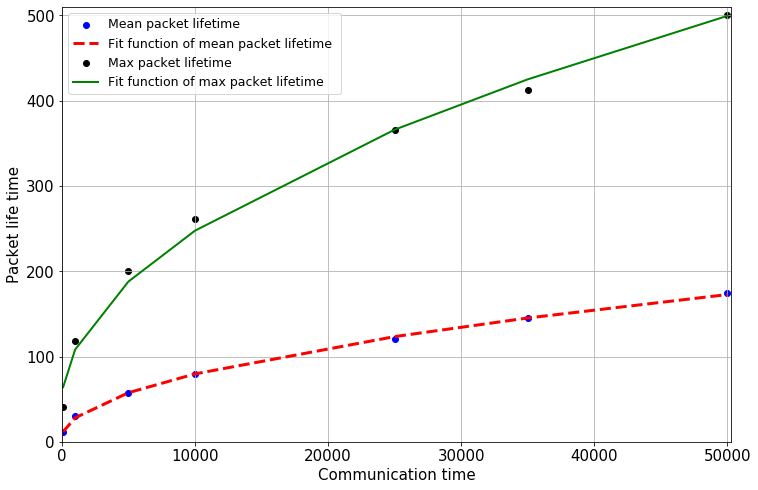

In [96]:
            #======= This plot is done for specific example of homogeneous setting when p_val=0.6 =======#


#==== By running the simulation you can find the following matrices ====#

#mean_value_T1=np.array([11.13,30.43,56.87,79.94,120,145,175])
#max_value_T1=np.array([40.35,118.33,200.34,261.44,366,412,500])
#Arrive_time=np.array([100,1000,5000,10000,25000,35000,50000])


mean_value_T1=np.zeros([np.size(Arrive_time)])
max_value_T1=np.zeros([np.size(Arrive_time)])

for life_t in range(np.size(Arrive_time)):
    mean_value_T1[life_t]=total_mean_T1[0,life_t]
    max_value_T1[life_t]=total_max_T1[0,life_t]

plt.figure(figsize=(12,8))

## ---- Fit Function for Max_value packet life time ---- ##

x = Arrive_time
y = max_value_T1
def fit_func(x, a, b,c):
    return a*np.sqrt(c*x) + b

params = curve_fit(fit_func, x, y)
[a, b,c] = params[0]
print('max_value_square root_function=','%.2f' %a,'sqrt(','%.2f' %c,'x)+','%.2f' %b)

## ---- Plot Max_value Fit Function ---- ##

def f1(t):
    return a*np.sqrt(c*x) + b
p0=plt.plot(x, f1(x), '-g',linewidth=2.0)

## ---- Fit Function for Mean_value packet life time ---- ##

x = Arrive_time
y = mean_value_T1
def fit_func(x, a, b,c):
    return a*np.sqrt(c*x) + b

params = curve_fit(fit_func, x, y)
[a, b,c] = params[0]
print('mean_value_square root_function=','%.2f' %a,'sqrt(','%.2f' %c,'x)+','%.2f' %b)

## ---- Plot Mean_value Fit Function ---- ##
def f1(t):
    return a*np.sqrt(c*x) + b
p2=plt.plot(x, f1(x), '--r',linewidth=3.0)

## ---- Scatter Plot ---- ##
p1=plt.scatter( Arrive_time,max_value_T1, color='k')
p3=plt.scatter( Arrive_time,mean_value_T1, color='b')


plt.legend((p3,p2[0],p1,p0[0]), ('Mean packet lifetime','Fit function of mean packet lifetime ','Max packet lifetime','Fit function of max packet lifetime '),fontsize = 'small')
plt.xlabel('Communication time')
plt.ylabel('Packet life time')
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

plt.ylim(0, 510)
plt.xlim(0, 50300)
plt.grid()
plt.show()